## Análisis bivariado

En esta sección se realiza el análisis bivariado de los datos, a partir de herramientas de visualización y tablas que nos sugieran ciertos patrones entre el *target* y los predictores. 

In [1]:
import pandas as pd 
import numpy as np # numpy y pandas to data wrangling 
from datetime import datetime, timedelta # to work w date
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
import scipy as scp

El análisis exploratorio se realiza con dos objetivos. Por un lado, se busca encontrar patrones entre la variable a predecir y los predictores. Por otra parte, también clarifica la forma de utilización de las variables. 

Para comenzar, importamos el dataset crudo con el target a predecir y los predictores que vamos a utilizar. Debido a que se intenta seguir la lógica establecida en el enfoque de validación, es decir, extraer de la base un subconjunto para entrenamiento y otro para testeo, el análisis exploratorio se realiza sobre los datos que se van a entrenar. La razón radica en que los datos que son para testeo del modelo serán utilizados únicamente a modo de evaluación, entendiéndose a los mismos como datos "desconocidos" al momento de explorar los datos y ajustar los modelos. Por esto, una vez importado el dataset nos quedamos con los primeros años de la serie, que va desde el 8 de agosto de 2015 hasta el 31 de diciembre de 2020.     

In [2]:
# importamos dataset
aux = 'https://drive.google.com/file/d/1GWaKdMRk4Fx9qGgBMioNeO3E7_I3bA8k/view?usp=sharing'
link ='https://drive.google.com/uc?id=' + aux.split('/')[-2]
df = pd.read_csv(link)
df = df.set_index('Date')

# subconjunto a utilizar: dataset de entrenamiento
start = df.index[0]
# Enfoque de validación
train = df[start:'2020-12-31']
train.head()

,Volume USDT_btc,cryptocurrency_adjusted,crypto_adjusted,bitcoin_adjusted,bitcoin price_adjusted,ethereum_adjusted,ethereum price_adjusted,stock market_adjusted,wall street_adjusted,interest rate_adjusted,...,y_lag4,y_lag5,y_lag6,y_lag7,unix_btc,open_btc,high_btc,low_btc,close_btc,Volume BTC_btc
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,3.8010,0.0,0.48,1.74,0.27,0.0,0.0,1.45,8.32,16.38,...,2.150,1.825,1.310,1.645,1438992000,275.92,282.24,262.65,263.00,1032.69
2015-08-11,0.9435,0.0,0.88,1.89,0.49,0.0,0.0,2.61,9.92,19.74,...,1.825,1.310,1.645,1.520,1439251200,266.22,269.26,261.61,269.26,247.49
2015-08-12,2.5580,0.0,0.87,1.83,0.47,0.0,0.0,3.48,10.40,20.58,...,1.310,1.645,1.520,1.410,1439337600,269.26,275.63,263.33,265.41,682.19
2015-08-13,3.1890,0.0,0.87,1.95,0.35,0.0,0.0,2.61,10.40,18.48,...,1.645,1.520,1.410,1.515,1439424000,265.41,269.88,260.00,263.00,838.99
2015-08-14,2.1290,0.0,0.83,1.68,0.32,0.0,0.0,2.32,10.88,16.80,...,1.520,1.410,1.515,1.615,1439510400,263.00,265.00,255.00,265.00,556.23


### Variable a predecir: precio diario promedio de ethereum 

En primer lugar, observamos la serie del precio diario promedio de ethereum, nuestra variable a predecir. Como se puede ver en la primera figura, la serie presenta un componente irregular no despreciable, la serie comienza los primeros años con valores cercanos a cero, para luego aumentar abruptamente, generando un diferentes picos desde mediados de 2017 hasta mediados de 2019 aproximadamente. Luego, la cotización permanece estable alrededor de los 200 usdt hasta mediados de 2020, donde la misma comienza a subir. Dicha irregularidad presenta una alta volatilidad o varianza, por lo que sería deseable poder aplicar alguna transformación a la serie antes de predecir.   

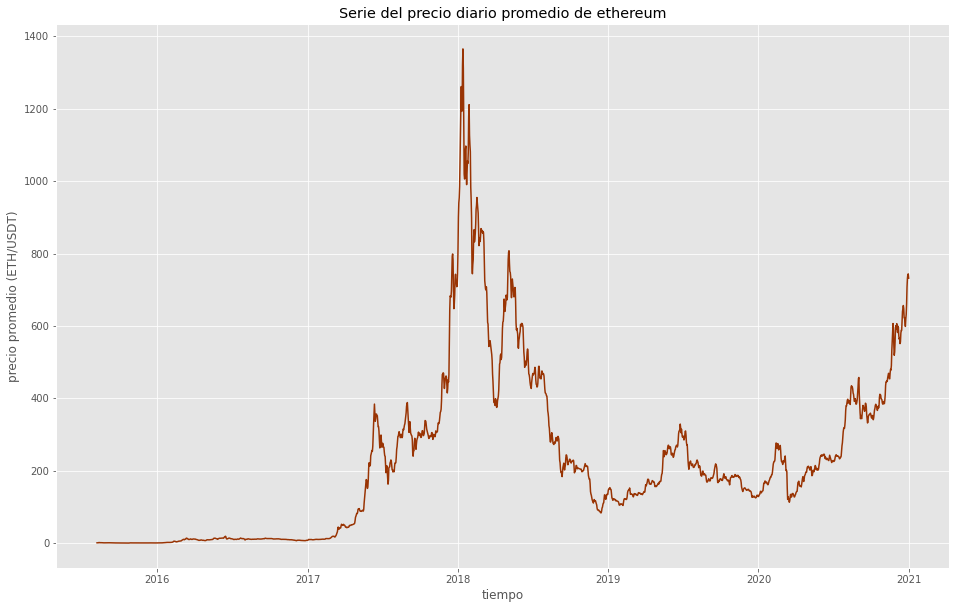

In [3]:
mpl.style.use('ggplot') # set estilo
mpl.rcParams.update({'font.size': 20}) # set tamaño de ticks
# graficamos la base ethereum completa
train.index = pd.to_datetime(train.index)
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(train['y_lag1'], color='#993404')
plt.ylabel("precio promedio (ETH/USDT)")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum");

Aclaración: la variable `y_lag1` representa el precio de ethereum con un rezago de 1 día y será utilizada para la predicción del precio del día siguiente al precio presente observado.


Por lo tanto, `y_lag{i}` con `i = 1, ..., 7` será utilizado para predecir el precio del día {i} luego del último día observado.


La transformación elegida es la transformación logarítmica, la cual permite una compresión de los datos, generando una serie con menor nivel de irregularidad y, por lo tanto, con mejor comportamiento para predecir. A continuación, se presenta la serie del precio promedio de ethereum diario en logaritmo. 

In [4]:
np.var(np.log10(train['y_lag1']))

0.7150378912136298

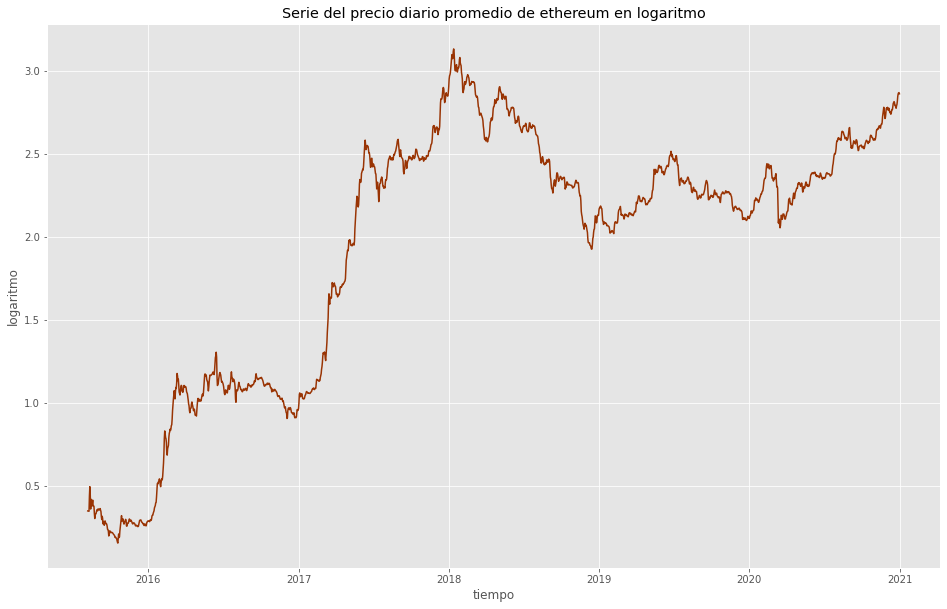

In [5]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(np.log10(train['y_lag1']+1), color='#993404')
plt.ylabel("logaritmo")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum en logaritmo");

Así, luego de aplicar el logaritmo, se logra mayor suavidad en el gráfico en comparación con los valores iniciales de la cotización.

A continuación se realiza la correlación entre cada una de las variables target y_lag{i} con i=1,...,7 y el resto de variables que componen el dataset.

Cabe recordar que la variable y_lag{i} corresponde a la predictora del precio de ethereum al siguiente día {i} después del último día observado.

###Comparación por correlación

En primer lugar realizamos un análisis de correlaciones lineales de pearson entre los diferentes rezagos del target y las variables predictoras. La idea detrás de esto es ver si podríamos proyectar un ejercicio de predicción con ventanas temporales mayores a un día de diferencia entre los predictores y la dependiente. Lo cual permitiría tener una mirada más amplia de la evolución predicha de la cotización de ethereum, permitiendo al usuario del modelo conocer su evolución futura en un rango de tiempo futuro mayor al día. 

In [6]:
#Correlación entre las target y otras variables
columnas = train.columns[1:len(train.columns)-1] #devuelve una lista con los nombres de las columnas
targets = ['y_lag1', 'y_lag2', 'y_lag3', 'y_lag4', 'y_lag5', 'y_lag6', 'y_lag7']
columnas = [e for e in columnas if e not in targets] # saco las variables a predecir
correlaciones = {}
for i in range(1,8):
  input = {}
  for c in columnas:
    corr = scp.stats.pearsonr(train[f'y_lag{i}'], train[c])[0]
    input[c] = corr
  correlaciones[f'y_lag{i}'] = input

In [7]:
correlaciones

{'y_lag1': {'cryptocurrency_adjusted': 0.7524065193051734,
  'crypto_adjusted': 0.8095000718304803,
  'bitcoin_adjusted': 0.5573525934228191,
  'bitcoin price_adjusted': 0.5854354400621145,
  'ethereum_adjusted': 0.6252474412436662,
  'ethereum price_adjusted': 0.6082259118076727,
  'stock market_adjusted': 0.0935248427600455,
  'wall street_adjusted': -0.28041767149680297,
  'interest rate_adjusted': 0.33102253599877746,
  'fed_adjusted': 0.1888774101729047,
  'bankruptcy_adjusted': -0.12240569775127902,
  'china_adjusted': 0.0713901756267789,
  'united states_adjusted': 0.09297368472834538,
  'war_adjusted': -0.22422240611532332,
  'russia_adjusted': -0.023613949389873427,
  'cryptocurrency_top_adjusted': 0.7920222053083069,
  'bitcoin_top_adjusted': 0.5257793217203066,
  'investment_top_adjusted': 0.21061257653402982,
  'ethereum_top_adjusted': 0.6786030073330246,
  'exchange_top_adjusted': 0.6579713280901952,
  'bankrup_top_adjusted': 0.3457913981257426,
  'stock_market_top_adjuste

En primer lugar, generamos un dataframe con las correlaciones lineales de pearson entre las variables independientes y el primer rezago de la cotización (`y_lag1`). Luego, analizamos la correlación utilizando como target el séptimo rezago del precio de ethereum (`y_lag7`). 

In [8]:
df_corr_lag1 = pd.DataFrame(correlaciones['y_lag1'].items(), columns = ['Predictores', 'Correlacion'])

In [9]:
df_corr_lag1['corr_abs'] = abs(df_corr_lag1['Correlacion'])

In [10]:
df_corr_lag1.sort_values('corr_abs', ascending = False)

,Predictores,Correlacion,corr_abs
36,close_eth,0.999110,0.999110
39,eth_close_open_mean,0.998156,0.998156
34,high_eth,0.997592,0.997592
35,low_eth,0.996777,0.996777
33,open_eth,0.995428,0.995428
1,crypto_adjusted,0.809500,0.809500
15,cryptocurrency_top_adjusted,0.792022,0.792022
0,cryptocurrency_adjusted,0.752407,0.752407
42,high_btc,0.749247,0.749247
41,open_btc,0.744810,0.744810


In [11]:
df_corr_lag7 = pd.DataFrame(correlaciones['y_lag7'].items(), columns = ['Predictores', 'Correlacion'])

In [12]:
df_corr_lag7['corr_abs'] = abs(df_corr_lag7['Correlacion'])

In [13]:
df_corr_lag7.sort_values('corr_abs', ascending = False)

,Predictores,Correlacion,corr_abs
36,close_eth,0.973860,0.973860
39,eth_close_open_mean,0.972392,0.972392
34,high_eth,0.972092,0.972092
35,low_eth,0.970465,0.970465
33,open_eth,0.969195,0.969195
1,crypto_adjusted,0.798089,0.798089
15,cryptocurrency_top_adjusted,0.790043,0.790043
42,high_btc,0.768992,0.768992
41,open_btc,0.763182,0.763182
44,close_btc,0.762169,0.762169


Comparando ambas tablas, podemos ver que la correlación más alta, que es con la variable "close_eth" es de 0.999110 para y_lag1 y 0.973860 para y_lag7. No sólo eso, sino que el orden entre las correlaciones parecería mantenerse al ampliar la ventana temporal a predecir. De esto se desprenden algunos puntos a considerar en el análisis. Por un lado, existen variables como el precio de cierre diario de ethereum que tienen una correlación lineal casi perfecta al predecir la cotización del día siguiente y cuya asociación lineal solamente disminuye aproximadamente en 0.025 puntos al pasar a la cotización del séptimo día futuro al actual, lo cual sigue siendo una correlación lineal sumamente alta. En segundo lugar, el orden de las asociaciones no varía de manera considerable al pasar de ambas variables dependientes, de hecho la información de ethereum como los distintos precios presentes tienen la mayor correlación con el target, por lo que considerar su cotización corriente es de suma importancia para la predicción. En tercer lugar, la alta correlación en ambas ventanas extremas genera un panorama alentador en términos de cuán lejos un modelo de predicción podría anticipar el precio futuro de ethereum. 

A su vez, *high_btc* aparece como una variable muy correlacionada con el precio de ethereum, confirmando la teoría que comentábamos en el archivo [**2.1 Análisis univariado**](https://colab.research.google.com/drive/1iqGw9KMUPGrJEMBnjgvQCGRqOvaNGE0G). Por lo tanto, podemos confirmar que el precio de ethereum también se asocia lineal y fuertemente con el precio de bitcoin.

También para el análisis univariado seleccionamos las variables con el mayor promedio de búsquedas diario y dos de los de menor promedio de búsquedas diario, pensando en que podían tener relación con el precio de ethereum.  Las variables fueron: 'banking_adjusted', 'investment_top_adjusted', 'covid19_adjusted' y 'elon musk_adjusted'.

Como habíamos visto en ese análisis, no se veía dependencia clara entre la búsqueda de esas palabras y el precio de ethereum. Aquí lo podemos confirmar. De esas cuatro palabras, la que tiene mayor correlación con el precio de ethereum a predecir es 'investment_top_adjusted' con 0.210613 contra *y_lag1* y 0.209713 contra *y_lag7*. Retomando el análisis en la sección de análisis univariado, las variables "de momento" tienen la característica de que se podrían correlacionar fuertemente con el target en un período específico de tiempo, por lo que considerar las correlaciones en todo el período de estudio podría subestimar la influencia de estos predictores, como es el caso de la palabra *covid19* o *elon musk*, que podrían tener un rol importante en detectar patrones más volátiles. De hecho, repetimos el ejercicio de correlación entre la palabra *covid19* y el target *y_lag1* pero restringiendo el período de tiempo a marzo de 2020 - diciembre de 2020.

In [14]:
scp.stats.pearsonr(train.loc['2020-03-01':, 'y_lag1'], train.loc['2020-03-01':, 'covid19_adjusted'])[0]

-0.47994942672760643

Como se puede ver, la correlación aumenta considerablemente y su signo pasa a cambiar. La magnitud pasa de 0.076 (signo positivo) en todo el período a 0.48 (signo negativo). De esta forma, la correlación indica que mayor frecuencia diaria de la palabra *covid 19* en google se asocia negativamente con la cotización del precio de ethereum del día siguiente al actual. 

### Gráficos de dispersión y distribución

A continuación, se realiza un análisis de dispersión entre la variable dependiente, rezagada 1 y 7 días, *y_lag1* e *y_lag7* respectivamente con las predictoras que vimos anteriormente tienen una alta correlación con el target. 

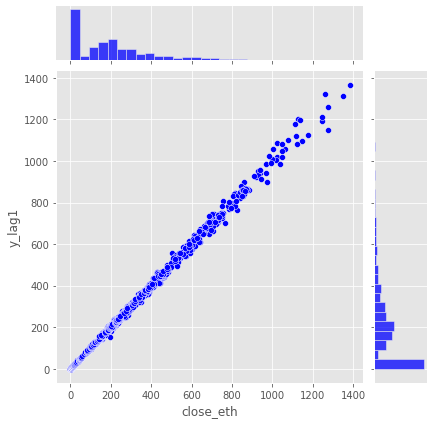

In [15]:
#Grafico usando un scatterplot y histrograma 
sns.jointplot(x = 'close_eth', y= 'y_lag1', data=train ,color='blue')

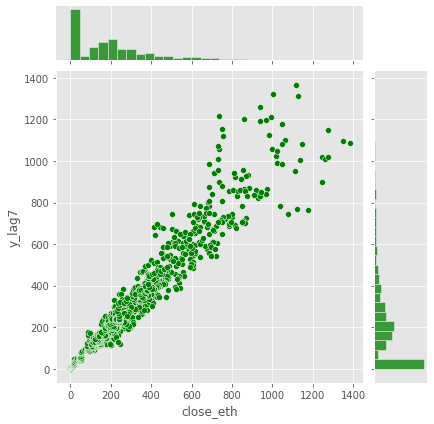

In [16]:
#Grafico usando un scatterplot y histrograma 
sns.jointplot(x = 'close_eth', y= 'y_lag7', data=train ,color='green')

Comparando las variables target y_lag1 e y_lag7 contra close_eth que es con la cual tienen la correlación más alta, se observa una mayor dispersión para el caso de y_lag7, lo que es esperable debido a que su correlación con eth_close es 2.5% menor que para y_lag1.

Por otro lado, a mayor valor de close_eth y de y_lag{i}, mayor dispersión del gráfico.

A su vez, durante gran parte del período el precio de ethereum se concentró entre 0 y 500 USD, lo cual se puede observar en el gráfico debido a una mayor densidad de puntos en ese área. La distribución de las variables es asimétrica hacia la derecha.

''

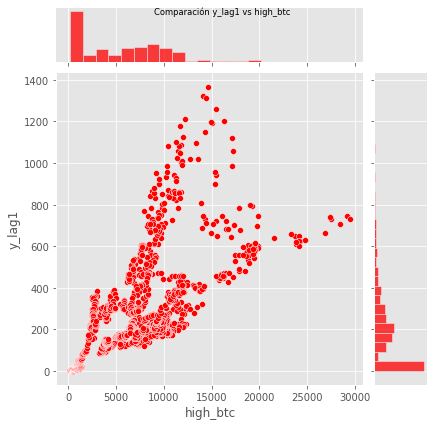

In [17]:
#Grafico usando un scatterplot y histograma 
sns.jointplot(x = 'high_btc', y= 'y_lag1', data=train ,color='red').fig.suptitle('Comparación y_lag1 vs high_btc', size='small')
;

''

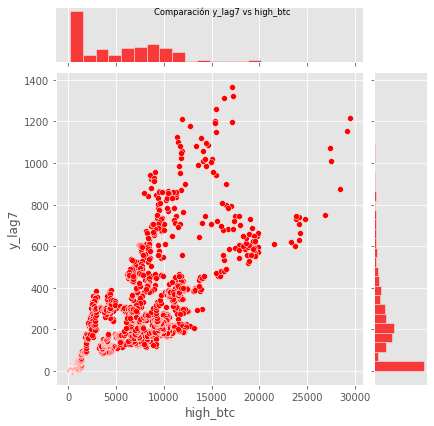

In [18]:
#Grafico usando un scatterplot y histograma 
sns.jointplot(x = 'high_btc', y= 'y_lag7', data=train ,color='red').fig.suptitle('Comparación y_lag7 vs high_btc', size='small')
;

En este caso, se observa una mayor dispersión que para el caso de la comparación contra close_eth, lo cual era un resultado esperado debido a que la correlación entre close_eth y las variables target son mayores que la correlación entre high_btc y las variables target.

De igual manera, se puede ver que para menores valores de high_btc y {y_lag1, y_lag7} la dispersión es menor que para valores más grandes en ambos ejes. 

A su vez, durante gran parte del período el precio de bitcoin se concentró entre 0 y 10.000 USD, lo cual se puede observar en el gráfico debido a una mayor densidad de puntos en ese área. Como conclusión podemos decir que a mayor precio de bitcoin o ethereum, la volatilidad es mayor debido a la menor cantidad de observaciones a precios tan altos.

Por último, la distribución de las variables es asimétrica hacia la derecha.

In [19]:
df_corr_lag1.sort_values('corr_abs', ascending = False)
#list(loc[0:4, 'Predictores'])


,Predictores,Correlacion,corr_abs
36,close_eth,0.999110,0.999110
39,eth_close_open_mean,0.998156,0.998156
34,high_eth,0.997592,0.997592
35,low_eth,0.996777,0.996777
33,open_eth,0.995428,0.995428
1,crypto_adjusted,0.809500,0.809500
15,cryptocurrency_top_adjusted,0.792022,0.792022
0,cryptocurrency_adjusted,0.752407,0.752407
42,high_btc,0.749247,0.749247
41,open_btc,0.744810,0.744810


In [20]:
train1 = train.loc[:,['close_eth', 'crypto_adjusted', 'high_btc', 'exchange_top_adjusted', 'digital_wallet_top_adjusted']]

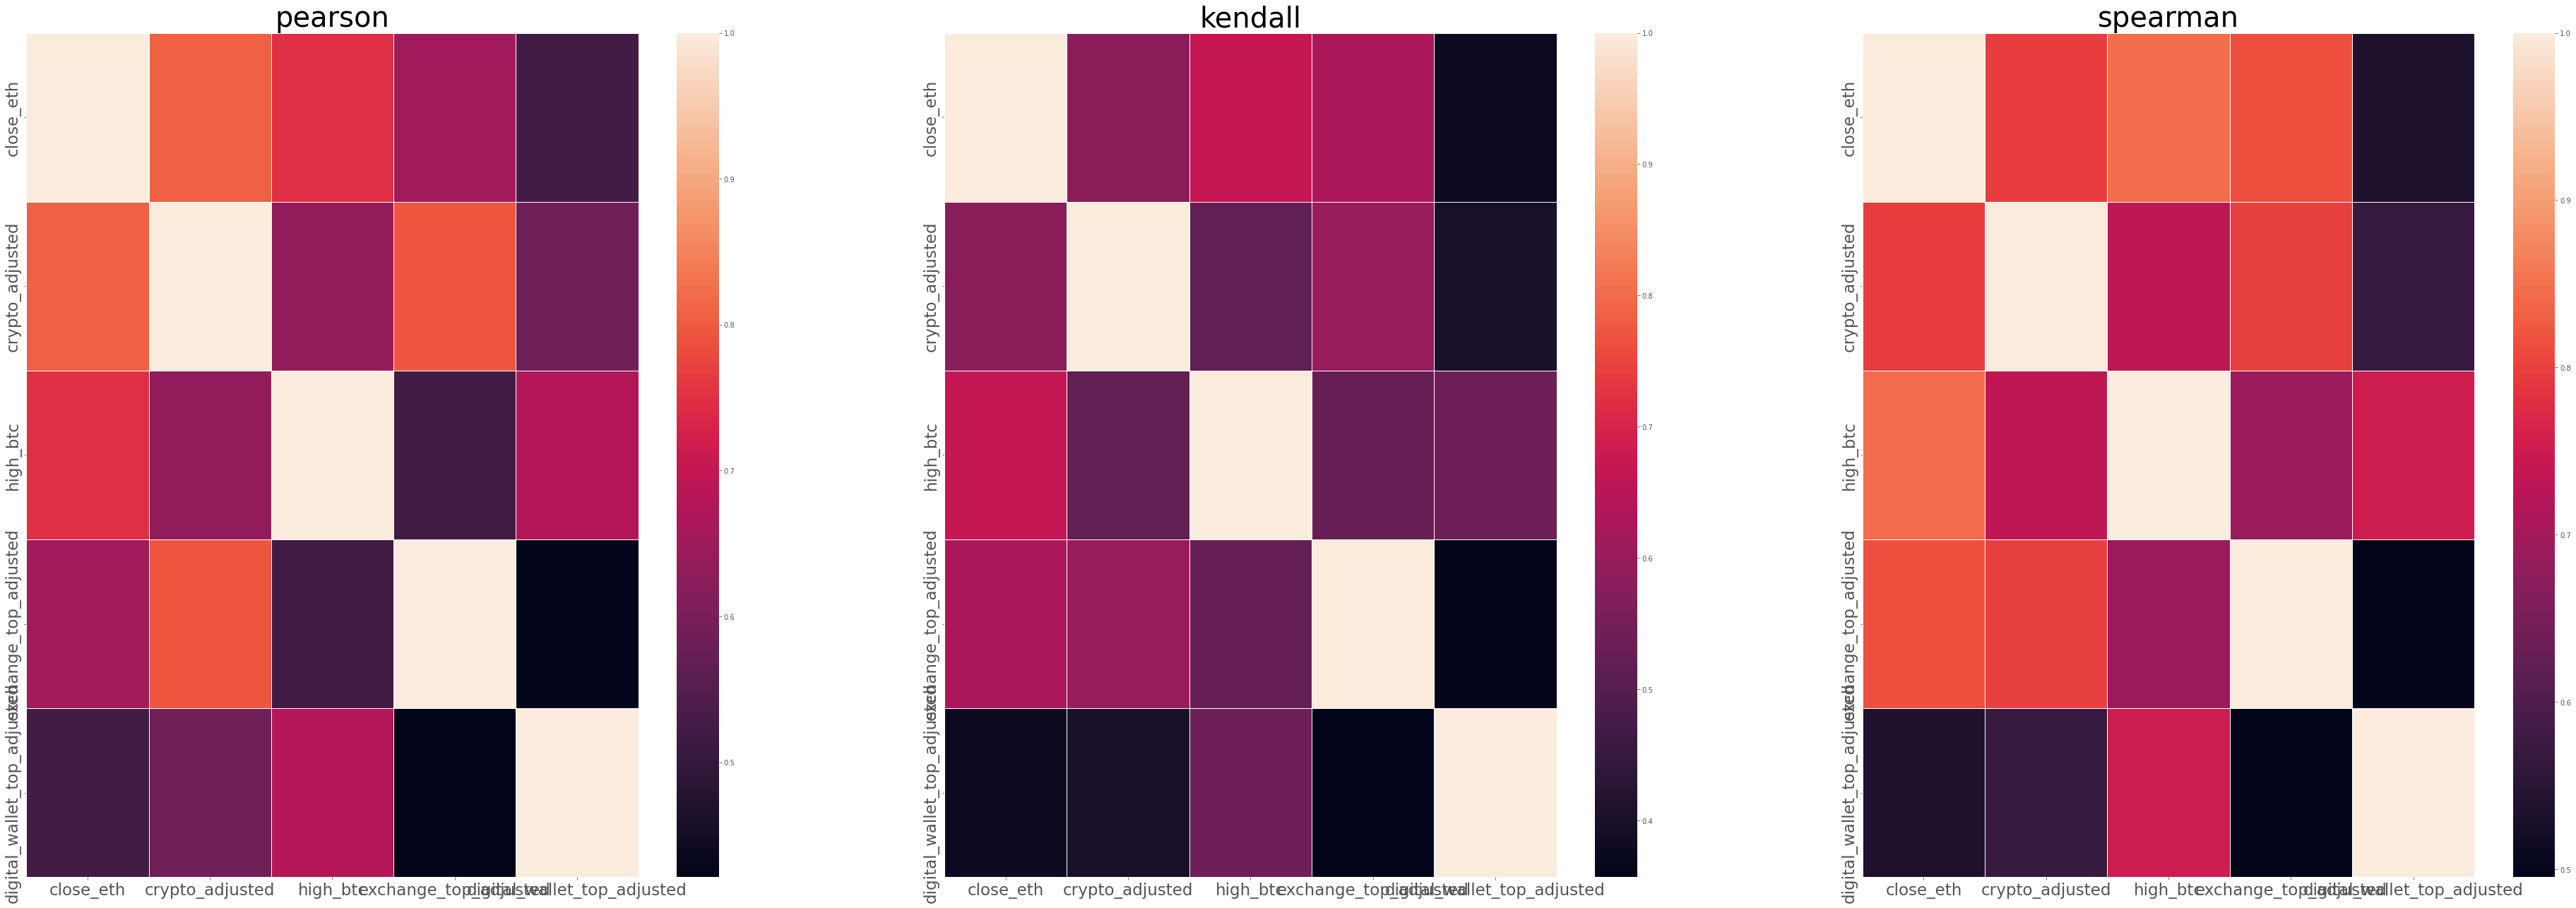

In [21]:
#generacion de los graficos de correlacion entre los 3 metodos, 
plt.figure(figsize=(66,22))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = train1.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 1)
  plt.title(i, fontsize=40)
  plt.yticks(fontsize=23)
  plt.xticks(fontsize=23)

Como se puede ver entre el metodo Spearman y Pearson hay valores diferentes. Eso se da porque los valores de pearson son diferenciados por la distribucion que asumimos que es normal y seguramente no lo sea.

A partir de eso, dado que muchos de nuestros predictores no presentan una distribución normal, nos enfocamos en analizar la matriz de Spearman.

Para close_eth es esperable que tenga una correlación alta con exchange_top_adjusted porque esta es una categoría que engloba muchas palabras relacionadas al mercado de criptomonedas. De hecho, la palabra crypto_adjusted parecería ser un input para la generación del tópico exchange (exchange_top_adjusted). La correlación con el precio más alto de bitcoin (high_btc) es una característica que ya la hemos analizado antes. 

Finalmente, el tópico digital_wallet no está tan correlacionado con el tópico exchange ni tampoco con la palabra crypto. De todos modos, sí está correlacionado con el precio más alto de bitcoin (high_btc).

Comparación entre el precio de cierre de Ethereum, el precio de cierre de Bitcoin y las búsquedas de Bitcoin y Ethereum:

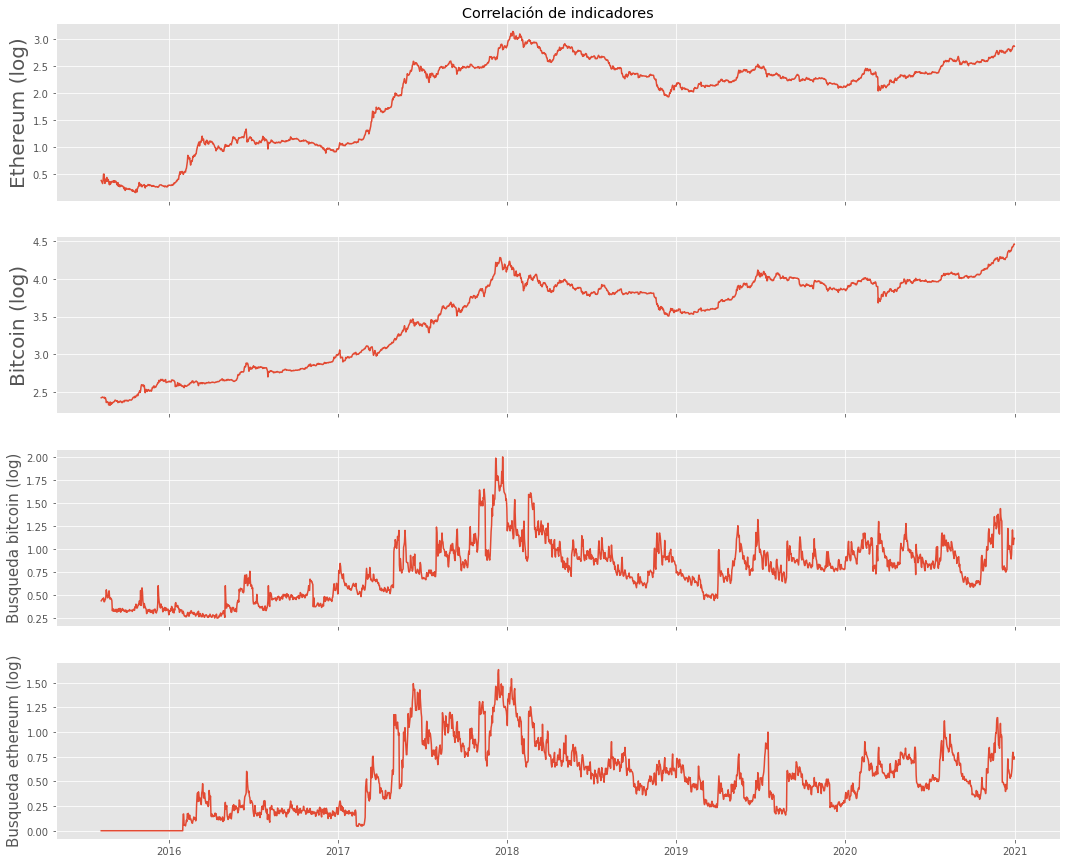

In [22]:
# defino el tamaño del gráfico
#sns.set(rc = {'figure.figsize':(22, 7)})
fig, ax = plt.subplots(nrows = 4, ncols=1, figsize=(18,15), sharex=True)

# armo el gráfico
ax[0].plot(np.log10(train['close_eth']+1))
ax[1].plot(np.log10(train['close_btc']+1))
ax[2].plot(np.log10(train['bitcoin_adjusted']+1))
ax[3].plot(np.log10(train['ethereum_adjusted']+1))

ax[0].set_title('Correlación de indicadores', )
ax[0].set_ylabel('Ethereum (log)', size=20)
ax[1].set_ylabel('Bitcoin (log)', size=20)
ax[2].set_ylabel('Busqueda bitcoin (log)', size=15)
ax[3].set_ylabel('Busqueda ethereum (log)', size=15);

En los gráficos anteriores se puede observar, de otro modo, cómo el precio de ethereum y el de bitcoin están muy correlacionados, debido a que ethereum sigue claramente la tendencia de precio de bitcoin.

A su vez, las búsquedas de ambas palabras se asocian con el movimiento del precio.